Suppose you are owing a supermarket mall and through membership cards, you have some basic data about your customers like Customer ID, age, gender, annual income and spending score. You want to understand the customers like who are the target customers so that the sense can be given to marketing team and then they plan the strategy accordingly.

A)Determine appropriate product pricing.
B)Develop customized marketing campaigns.
c)Design an optimal distribution strategy.
D)Choose specific product features for deployment.
E)Prioritize new product development efforts.

In [2]:
##importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [27]:
## importing the dataset

dataset = pd.read_csv("/home/mona/python_notebooks/supervised_machine_learning/data_files/mall_customers_data.csv") 
dataset.head()

,CustomerID,Gender,Age,Annual_Income,Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Exploratory Data Analysis

The range of spending score is more than the annual income score

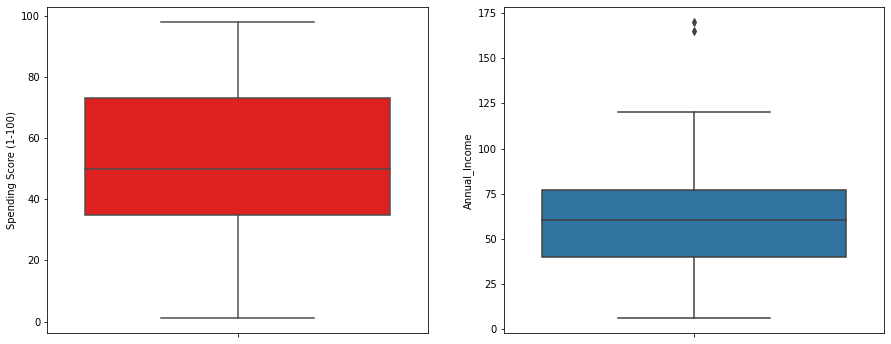

In [8]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=dataset["Spending Score (1-100)"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=dataset["Annual_Income"])
plt.show()

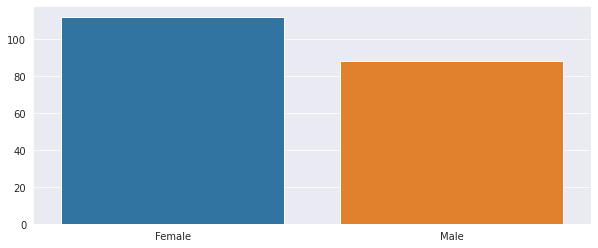

In [9]:
genders = dataset.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

A bar plot to check the distribution of number of customers in each age group. Clearly the 26–35 age group outweighs every other age group.

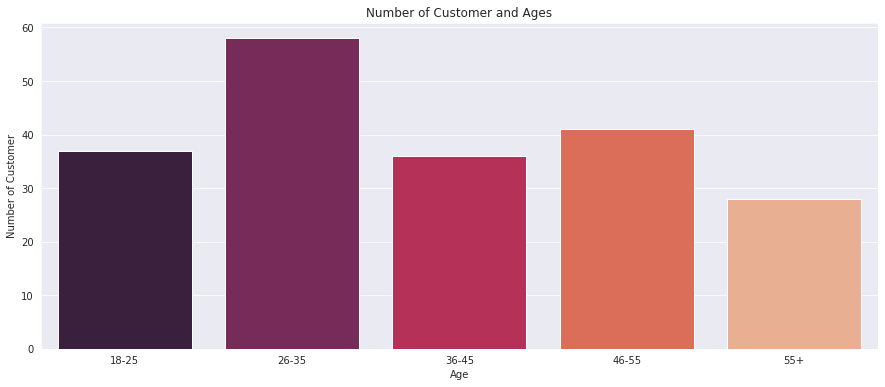

In [10]:
age18_25 = dataset.Age[(dataset.Age <= 25) & (dataset.Age >= 18)]
age26_35 = dataset.Age[(dataset.Age <= 35) & (dataset.Age >= 26)]
age36_45 = dataset.Age[(dataset.Age <= 45) & (dataset.Age >= 36)]
age46_55 = dataset.Age[(dataset.Age <= 55) & (dataset.Age >= 46)]
age55above = dataset.Age[dataset.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

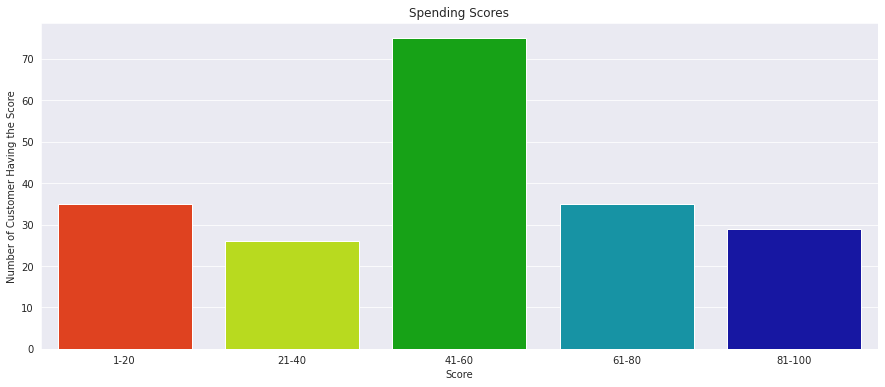

In [12]:
ss1_20 = dataset["Spending Score (1-100)"][(dataset["Spending Score (1-100)"] >= 1) & (dataset["Spending Score (1-100)"] <= 20)]
ss21_40 = dataset["Spending Score (1-100)"][(dataset["Spending Score (1-100)"] >= 21) & (dataset["Spending Score (1-100)"] <= 40)]
ss41_60 = dataset["Spending Score (1-100)"][(dataset["Spending Score (1-100)"] >= 41) & (dataset["Spending Score (1-100)"] <= 60)]
ss61_80 = dataset["Spending Score (1-100)"][(dataset["Spending Score (1-100)"] >= 61) & (dataset["Spending Score (1-100)"] <= 80)]
ss81_100 = dataset["Spending Score (1-100)"][(dataset["Spending Score (1-100)"] >= 81) & (dataset["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

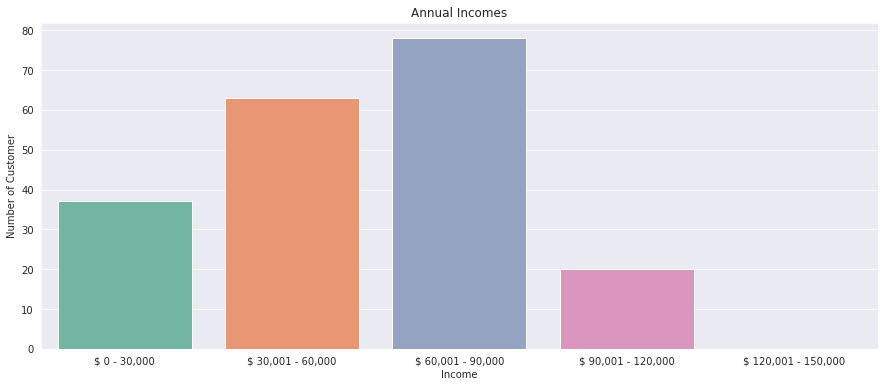

In [14]:
ai0_30 = dataset["Annual_Income"][(dataset["Annual_Income"] >= 0) & (dataset["Annual_Income"] <= 30)]
ai31_60 = dataset["Annual_Income"][(dataset["Annual_Income"] >= 31) & (dataset["Annual_Income"] <= 60)]
ai61_90 = dataset["Annual_Income"][(dataset["Annual_Income"] >= 61) & (dataset["Annual_Income"] <= 90)]
ai91_120 = dataset["Annual_Income"][(dataset["Annual_Income"] >= 91) & (dataset["Annual_Income"] <= 120)]
ai121_150 = dataset["Annual_Income"][(dataset["Annual_Income"] >= 121) & (dataset["Annual_Income"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

In [28]:
## This being a clustering problem, We don't need any dependent variable for data pre-processing.
##Currently we have no idea about what to determine. So we will just add a line of code for the matrix of features

xx = dataset.iloc[:, [3, 4]].values  

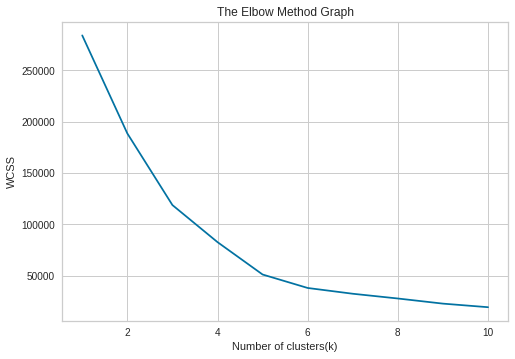

In [29]:
#finding optimal number of clusters/ selecting the value of k using the elbow method  

wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(xx)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elbow Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('WCSS')  
plt.show()  

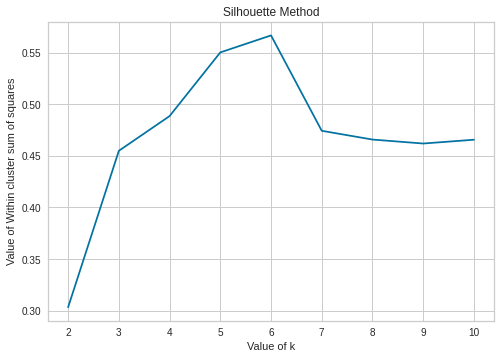

In [33]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(xx)
    labels = kmeans.labels_
    sil.append(silhouette_score(xx, labels, metric = 'euclidean'))
    
plt.plot(range(2,11),sil)
plt.xlabel("Value of k")
plt.ylabel("Value of Within cluster sum of squares")
plt.title("Silhouette Method")
plt.show()

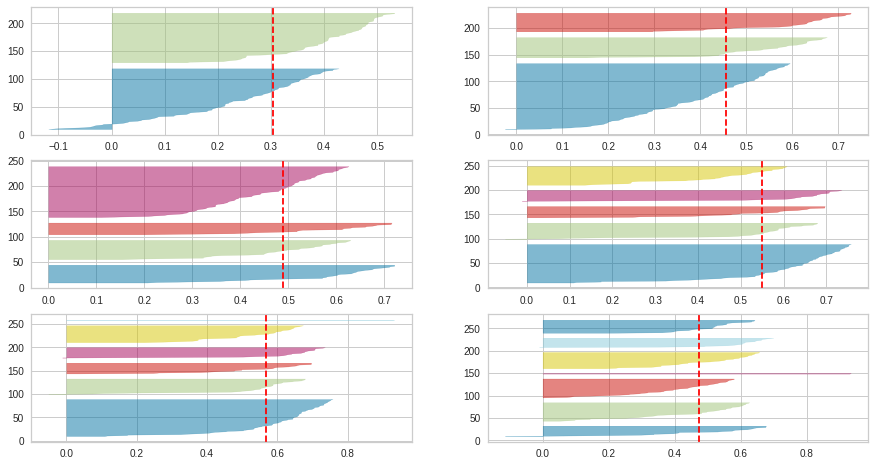

In [34]:
import yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5, 6, 7]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(xx)

In [35]:
####Applying k means with selected value of k and training the K-means model on a dataset  

kmeans = KMeans(n_clusters=6, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(xx)  

In [36]:
print(y_predict)

[2 3 2 3 2 3 2 3 2 3 2 2 2 3 2 3 2 2 2 3 3 3 3 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 0 0 2 3 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 3 1 4 1 4 1 4 2 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 5 5]


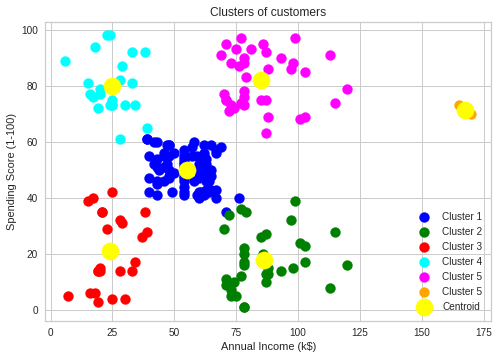

In [37]:
###Visualizing the clusters

#Converting dataframe into array for boolean subsetting purpose for plotting
plt.scatter(xx[y_predict == 0, 0], xx[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(xx[y_predict == 1, 0], xx[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(xx[y_predict== 2, 0], xx[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
plt.scatter(xx[y_predict == 3, 0], xx[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
plt.scatter(xx[y_predict == 4, 0], xx[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster
plt.scatter(xx[y_predict == 5, 0], xx[y_predict == 5, 1], s = 100, c = 'orange', label = 'Cluster 5') #for sixth cluster  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
plt.title('Clusters of customers')  
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')  
plt.legend()  
plt.show()  

In [18]:
#### to compare 3 variables altogether


dataset.drop("CustomerID", axis=1, inplace = True)
dataset.head()

,Gender,Age,Annual_Income,Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [19]:
### Taking care of categorical variables
dataset = pd.get_dummies(dataset, drop_first = True)
dataset.head()

,Age,Annual_Income,Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [21]:
dataset.drop("Gender_Male", axis=1, inplace = True)
dataset.head()

,Age,Annual_Income,Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


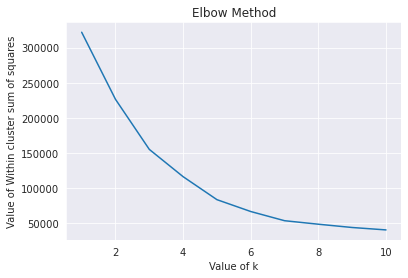

In [22]:
#### applying elbow method like before to find out k
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(dataset)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.xlabel("Value of k")
plt.ylabel("Value of Within cluster sum of squares")
plt.title("Elbow Method")
plt.show()

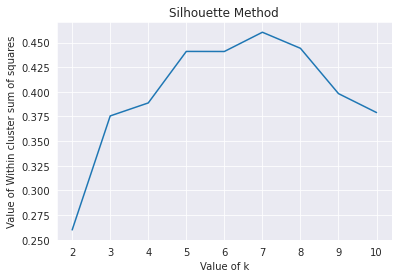

In [23]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(dataset)
    labels = kmeans.labels_
    sil.append(silhouette_score(dataset, labels, metric = 'euclidean'))
    
plt.plot(range(2,11),sil)
plt.xlabel("Value of k")
plt.ylabel("Value of Within cluster sum of squares")
plt.title("Silhouette Method")
plt.show()

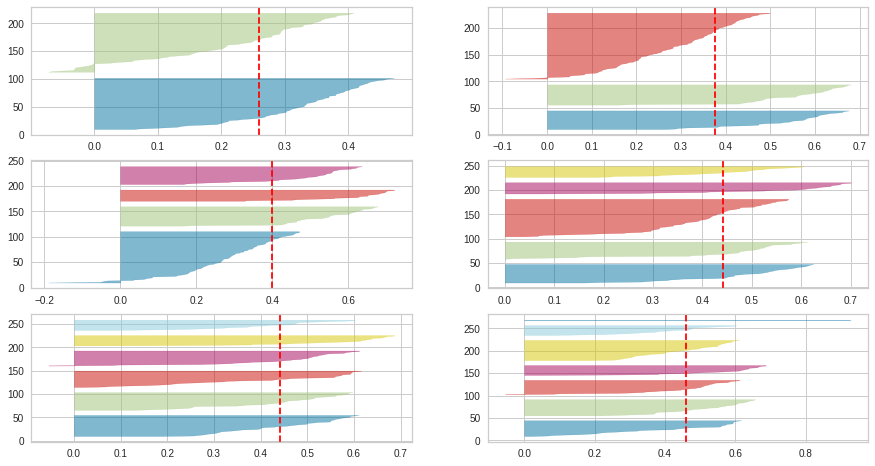

In [24]:
import yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5, 6, 7]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(dataset)

## Applying the clustering with analysed value of k

In [25]:
kmeans = KMeans(n_clusters= 6)
y_kmeans = kmeans.fit_predict(dataset)

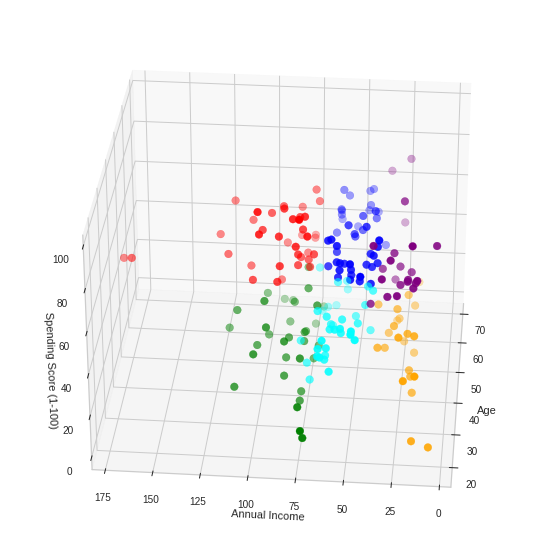

In [26]:
#### visualizing the clustering

from mpl_toolkits.mplot3d import Axes3D
#%matplotlib notebook

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset.Age[kmeans.labels_ == 0], dataset["Annual_Income"][kmeans.labels_ == 0], dataset["Spending Score (1-100)"][kmeans.labels_ == 0], c='blue', s=60)
ax.scatter(dataset.Age[kmeans.labels_ == 1], dataset["Annual_Income"][kmeans.labels_ == 1], dataset["Spending Score (1-100)"][kmeans.labels_ == 1], c='red', s=60)
ax.scatter(dataset.Age[kmeans.labels_ == 2], dataset["Annual_Income"][kmeans.labels_ == 2], dataset["Spending Score (1-100)"][kmeans.labels_ == 2], c='green', s=60)
ax.scatter(dataset.Age[kmeans.labels_ == 3], dataset["Annual_Income"][kmeans.labels_ == 3], dataset["Spending Score (1-100)"][kmeans.labels_ == 3], c='orange', s=60)
ax.scatter(dataset.Age[kmeans.labels_ == 4], dataset["Annual_Income"][kmeans.labels_ == 4], dataset["Spending Score (1-100)"][kmeans.labels_ == 4], c='purple', s=60)
ax.scatter(dataset.Age[kmeans.labels_ == 5], dataset["Annual_Income"][kmeans.labels_ == 5], dataset["Spending Score (1-100)"][kmeans.labels_ == 5], c='cyan', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income")
ax.set_zlabel('Spending Score (1-100)')
plt.show()
